In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
#n_samples = train_X.shape[0]

In [12]:
#imput setting
x = tf.placeholder('float')
y = tf.placeholder('float')

#parameter setting
w = tf.Variable(numpy.random.randn(), name='w')
b = tf.Variable(numpy.random.randn(), name='b')

In [13]:
pred_y = tf.add(tf.multiply(x, w), b) #predic=w*x+b
cost = tf.reduce_mean(tf.square(pred_y - y))

learning_rate = 0.01
training_epochs = 1000
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
cost_history = np.empty(shape=[1],dtype=float)

for e in range(training_epochs):
    sess.run(optimizer, feed_dict={x:train_X, y:train_Y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={x:train_X, y:train_Y}))
print('training cost=', cost_history[-1], 'w=', sess.run(w), 'b=', sess.run(b), '\n')

training cost= 0.15385770797729492 w= 0.25157034 b= 0.79925907 



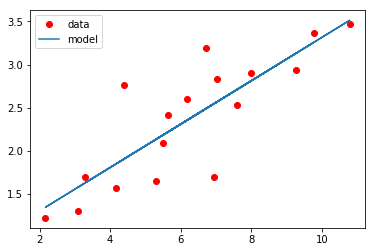

In [26]:
plt.plot(train_X, train_Y, 'ro', label='data')
plt.plot(train_X, sess.run(pred_y, feed_dict={x:train_X, y:train_Y}), label='model')
plt.legend()
plt.show()